# Pseudo-4D x-ray characterization of eutectic solidification (EBSD analysis summary)

Author: Paul Chao  
Contact: pchao@umich.edu  

21 January 2023

This notebook describes detailes related to processing the EBSD data.

The published notebooks are a guide for users analyzing pseudo-4D data. The goal is to share the code and methods used for this research. We hope this will provide a useful starting point for scientists planning to do their own studies. While the analysis was done in Matlab, Jupyter notebooks are an excellent format to share equations, computational output, visualizations, and other multimedia resources, along with explanatory text in a single document. Furthermore, it is very convenient to share and view the notebook in Github. As such, all codes are set up in Matlab-Jupyter in an effort to create a clear and understandable workflow.  

Original article: Chao, P., Lindemann, G. R., Hunter, A. H., & Shahani, A. J. (2022). Pseudo-4D view of the growth and form of locked eutectic colonies. Acta Materialia, 118335. https://doi.org/10.48550/arXiv.2206.11667


In [1]:
ver

-----------------------------------------------------------------------------------------------------
MATLAB Version: 9.11.0.1769968 (R2021b)
MATLAB License Number: 820543
Operating System: Microsoft Windows 10 Enterprise Version 10.0 (Build 19042)
Java Version: Java 1.8.0_202-b08 with Oracle Corporation Java HotSpot(TM) 64-Bit Server VM mixed mode
-----------------------------------------------------------------------------------------------------
MATLAB                                                Version 9.11        (R2021b)
Simulink                                              Version 10.4        (R2021b)
Computer Vision Toolbox                               Version 10.1        (R2021b)
Curve Fitting Toolbox                                 Version 3.6         (R2021b)
Data Acquisition Toolbox                              Version 4.4         (R2021b)
Deep Learning HDL Toolbox                             Version 1.2         (R2021b)
Deep Learning Toolbox                            

## Set up mtex

[MTEX](https://mtex-toolbox.github.io/Documentation) is a free Matlab toolbox for analyzing and modeling crystallographic textures by means of EBSD or pole figure data. It is developed on a free and opensource basis by an interdisciplinary team of material scientists, geologists and mathematicians. 

In [2]:
startup_mtex

initialize MTEX 5.6.1  .... done!



## Import EBSD Data

  I'm going to colorize the orientation data with the 
  standard MTEX ipf colorkey. To view the colorkey do:
 
  ipfKey = ipfColorKey(ori_variable_name)
  plot(ipfKey)
  I'm going to colorize the orientation data with the 
  standard MTEX ipf colorkey. To view the colorkey do:
 
  ipfKey = ipfColorKey(ori_variable_name)
  plot(ipfKey)
  I'm going to colorize the orientation data with the 
  standard MTEX ipf colorkey. To view the colorkey do:
 
  ipfKey = ipfColorKey(ori_variable_name)
  plot(ipfKey)
  I'm going to colorize the orientation data with the 
  standard MTEX ipf colorkey. To view the colorkey do:
 
  ipfKey = ipfColorKey(ori_variable_name)
  plot(ipfKey)



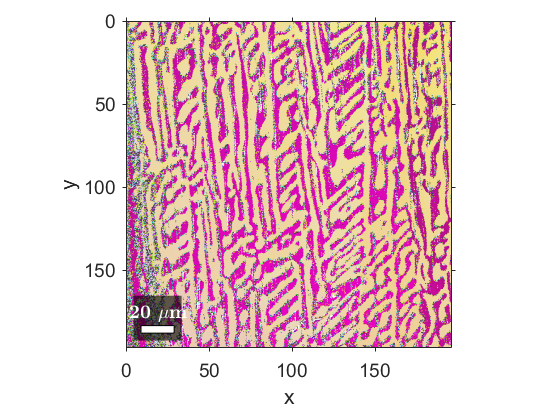

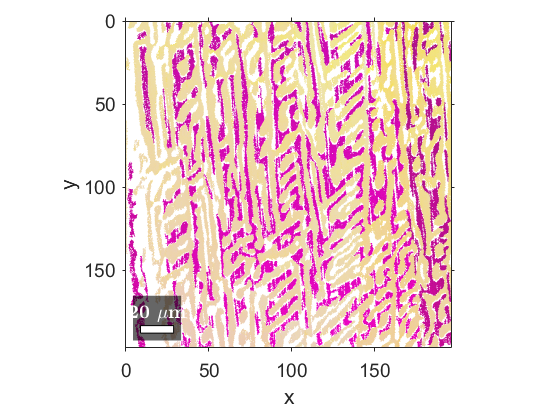

In [3]:
%% Import Script for EBSD Data
%
% This script was automatically created by the import wizard. You should
% run the whoole script or parts of it in order to import your data. There
% is no problem in making any changes to this script.

%% Specify Crystal and Specimen Symmetries

% crystal symmetry
CS = {... 
  'notIndexed',...
  crystalSymmetry('422', [6.1 6.1 4.9], 'mineral', 'Al2Cu', 'color', [0.53 0.81 0.98]),...
  crystalSymmetry('432', [4 4 4], 'mineral', 'Al', 'color', [0.56 0.74 0.56])};

% plotting convention
setMTEXpref('xAxisDirection','east');
setMTEXpref('zAxisDirection','intoPlane');

%% Specify File Names

% path to files

% which files to be imported
fname = 'EBSD/Al-Al2Cu-EBSDmap.ang';

%% Import the Data

% create an EBSD variable containing the data
ebsd = EBSD.load(fname,CS,'interface','ang',...
 'convertEuler2SpatialReferenceFrame','setting 2');
 
%% Plot imported data
 
figure,plot(ebsd('Al2Cu'),ebsd('Al2Cu').orientations,'coordinates','on')
hold on
plot(ebsd('Al'),ebsd('Al').orientations,'coordinates','on')
 
%% Clean up and show
% Filter and remove small points/noise

[grains,ebsd.grainId,ebsd.mis2mean] = calcGrains(ebsd('indexed'),'threshold',5*degree);
%notIndexed = grains('notIndexed')

% remove small grains
ebsd(grains(grains.grainSize<50)) = [];


% repeat grain reconstruction
[grains,ebsd.grainId,ebsd.mis2mean] = calcGrains(ebsd('indexed'),'threshold',5*degree);

%% Plot cleaned data

figure,plot(ebsd('Al2Cu'),ebsd('Al2Cu').orientations,'coordinates','on')
hold on
plot(ebsd('Al'),ebsd('Al').orientations,'coordinates','on')

### Plot Pole Figure

In [4]:
% Get the orientation
Al_all_ori = ebsd('Al').orientations;
Al2Cu_all_ori = ebsd('Al2Cu').orientations;

In [5]:
% Beta 6
% (111)Al // (2-11)Al2Cu
%  [-110]Al // [120]Al2Cu
OR_label = 'beta6';
Al_plane = [1 -1 1];
Al2Cu_plane = [1 2 -1];
Al_dir = [-1 -1 0];
Al2Cu_dir = [2 -1 0];

disp([['Calculations for the OR ' OR_label ' defined as:'], newline, ...
    ['(' num2str(Al_plane) ')_Al || (' num2str(Al2Cu_plane) ')_Al2Cu'], newline,...
    ['[' num2str(Al_dir) ']_Al || [' num2str(Al2Cu_dir) ']_Al2Cu']]);
    
Al_plane_mtex = Miller(Al_plane(1),Al_plane(2),Al_plane(3),'hkl',Al_all_ori.CS, 'unique');
Al2Cu_plane_mtex = Miller(Al2Cu_plane(1),Al2Cu_plane(2),Al2Cu_plane(3),'hkl',Al2Cu_all_ori.CS, 'unique');
Al_dir_mtex = Miller(Al_dir(1),Al_dir(2),Al_dir(3),'uvw',Al_all_ori.CS, 'unique');
Al2Cu_dir_mtex =  Miller(Al2Cu_dir(1),Al2Cu_dir(2),Al2Cu_dir(3),'uvw',Al2Cu_all_ori.CS, 'unique');

%% Check OR values and output to command window
disp(' * Angle between plane and dir')
Al_plane_dir_angle = angle(Al_plane_mtex, Al_dir_mtex,'noSymmetry')./degree;
Al2Cu_plane_dir_angle = angle(Al2Cu_plane_mtex,Al2Cu_dir_mtex,'noSymmetry')./degree;
disp( [' * Angle between (' num2str(Al_plane) ')_Al and [' num2str(Al_dir) ']_Al :: ' num2str(Al_plane_dir_angle) ' deg.']);
disp( [' * Angle between (' num2str(Al2Cu_plane) ')_Al2Cu and [' num2str(Al2Cu_dir) ']_Al2Cu :: ' num2str(Al2Cu_plane_dir_angle) ' deg.']);

Calculations for the OR beta6 defined as:
(1 -1  1)_Al || (1  2 -1)_Al2Cu
[-1 -1  0]_Al || [2 -1  0]_Al2Cu
 * Angle between plane and dir
 * Angle between (1 -1  1)_Al and [-1 -1  0]_Al :: 90 deg.
 * Angle between (1  2 -1)_Al2Cu and [2 -1  0]_Al2Cu :: 90 deg.



 ** Angle between (1 -1  1)_Al || (1  2 -1)_Al2Cu :: 146.12 deg.
 ** Angle between [-1 -1  0]_Al || [2 -1  0]_Al2Cu :: 121.8862 deg.



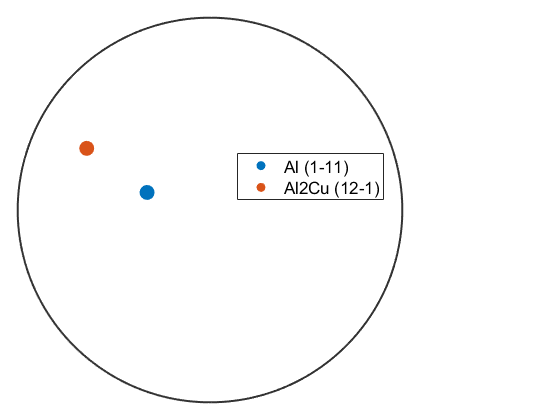

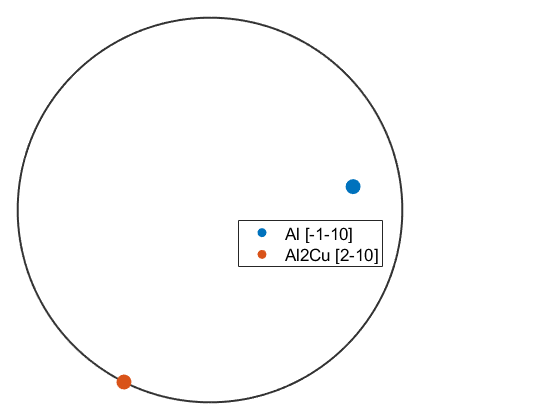

In [6]:
Al_plane_mtex_mean_ori = mean(Al_all_ori)*Al_plane_mtex; 
Al2Cu_plane_mtex_mean_ori = mean(Al2Cu_all_ori)*Al2Cu_plane_mtex; 

OR_plane_angle = angle(Al_plane_mtex_mean_ori,Al2Cu_plane_mtex_mean_ori)./degree;
disp([' ** Angle between (' num2str(Al_plane) ')_Al || (' num2str(Al2Cu_plane) ')_Al2Cu :: ' num2str(OR_plane_angle) ' deg.'])

Al_dir_mtex_mean_ori = mean(Al_all_ori)*Al_dir_mtex; 
Al2Cu_dir_mtex_mean_ori = mean(Al2Cu_all_ori)*Al2Cu_dir_mtex; 

OR_dir_angle = angle(Al_dir_mtex_mean_ori,Al2Cu_dir_mtex_mean_ori)./degree;
disp([' ** Angle between [' num2str(Al_dir) ']_Al || [' num2str(Al2Cu_dir) ']_Al2Cu :: ' num2str(OR_dir_angle) ' deg.'])

%%% Make unique PF and save

% format as string
Al_unique_plane_legend_str = [num2str(Al_plane(1)) num2str(Al_plane(2)) num2str(Al_plane(3))];
Al2Cu_unique_plane_legend_str = [num2str(Al2Cu_plane(1)) num2str(Al2Cu_plane(2)) num2str(Al2Cu_plane(3))];
Al_unique_dir_legend_str = [num2str(Al_dir(1)) num2str(Al_dir(2)) num2str(Al_dir(3))];
Al2Cu_unique_dir_legend_str = [num2str(Al2Cu_dir(1)) num2str(Al2Cu_dir(2)) num2str(Al2Cu_dir(3))];

% Show and save PF
% aligned
figure,
plot(inv(mean(Al2Cu_all_ori))*Al_plane_mtex_mean_ori,'DisplayName',['Al (' Al_unique_plane_legend_str ')'],'antipodal')
hold on
plot(inv(mean(Al2Cu_all_ori))*Al2Cu_plane_mtex_mean_ori,'DisplayName',['Al2Cu (' Al2Cu_unique_plane_legend_str ')'],'antipodal')
hold off
legend('location','best')
%export_fig(gcf,[save_PF_dir '\OR_align_' OR_label '_unique_planePF_Al' Al_plane_legend_str '_Al2Cu' Al2Cu_plane_legend_str '.png'])

figure,
plot(inv(mean(Al2Cu_all_ori))*Al_dir_mtex_mean_ori,'DisplayName',['Al [' Al_unique_dir_legend_str ']'],'antipodal')
hold on
plot(inv(mean(Al2Cu_all_ori))*Al2Cu_dir_mtex_mean_ori,'DisplayName',['Al2Cu [' Al2Cu_unique_dir_legend_str ']'],'antipodal')
hold off
legend('location','best')
%export_fig(gcf,[save_PF_dir '\OR_align_' OR_label '_unique_dirPF_Al' Al_dir_legend_str '_Al2Cu' Al2Cu_dir_legend_str '.png'])

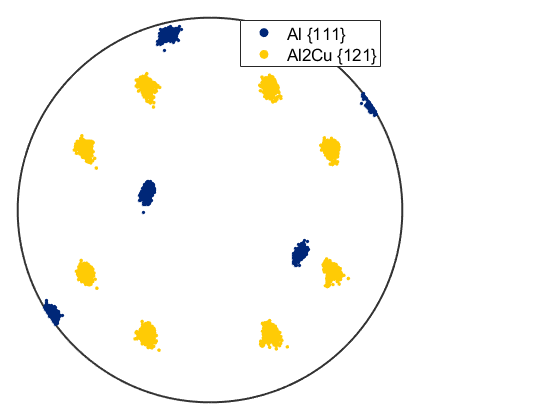

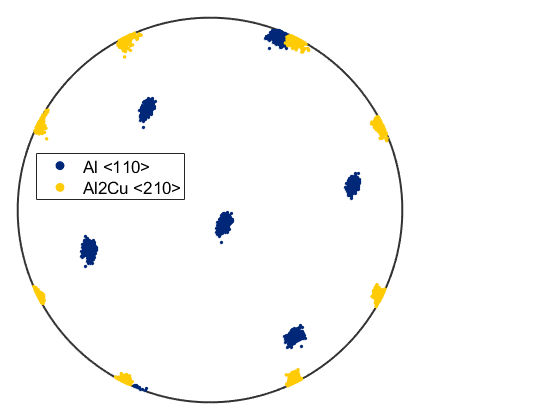

In [7]:
%% Align general PF to Al2Cu_001
Al_plane_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al_all_ori*symmetrise(Al_plane_mtex); 
Al2Cu_plane_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al2Cu_all_ori*symmetrise(Al2Cu_plane_mtex); 

Al_dir_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al_all_ori*symmetrise(Al_dir_mtex);
Al2Cu_dir_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al2Cu_all_ori*symmetrise(Al2Cu_dir_mtex); 

% format as string
Al_plane_legend_str = [num2str(abs(Al_plane(1))) num2str(abs(Al_plane(2))) num2str(abs(Al_plane(3)))];
Al2Cu_plane_legend_str = [num2str(abs(Al2Cu_plane(1))) num2str(abs(Al2Cu_plane(2))) num2str(abs(Al2Cu_plane(3)))];
Al_dir_legend_str = [num2str(abs(Al_dir(1))) num2str(abs(Al_dir(2))) num2str(abs(Al_dir(3)))];
Al2Cu_dir_legend_str = [num2str(abs(Al2Cu_dir(1))) num2str(abs(Al2Cu_dir(2))) num2str(abs(Al2Cu_dir(3)))];

% Show and save PF
figure,
% Al in Blue, [0 39 76]/255
plot(Al_plane_mtex_all_sym_ori,'DisplayName',...
    ['Al \{' Al_plane_legend_str '\}'],'antipodal', 'MarkerColor', [0 39 120]/255, 'MarkerSize',2)
hold on
% Al2Cu in yellow, [255 203 5]/255
plot(Al2Cu_plane_mtex_all_sym_ori,'DisplayName',...
    ['Al2Cu \{' Al2Cu_plane_legend_str '\}'],'antipodal', 'MarkerColor', [255 203 5]/255, 'MarkerSize',2)
hold off
legend('location','best')

figure,
plot(Al_dir_mtex_all_sym_ori,'DisplayName',...
    ['Al <' Al_dir_legend_str '>'],'antipodal','MarkerColor', [0 39 120]/255, 'MarkerSize',2)
hold on
plot(Al2Cu_dir_mtex_all_sym_ori,'DisplayName',...
    ['Al2Cu <' Al2Cu_dir_legend_str '>'],'antipodal','MarkerColor', [255 203 5]/255, 'MarkerSize',2)
hold off
legend('location','best')

Calculations for the OR alpha4 defined as:
(0  1  0)_Al || (0  0  1)_Al2Cu
[1  0  3]_Al || [0  1  0]_Al2Cu
 * Angle between plane and dir
 * Angle between (0  1  0)_Al and [1  0  3]_Al :: 90 deg.
 * Angle between (0  0  1)_Al2Cu and [0  1  0]_Al2Cu :: 90 deg.



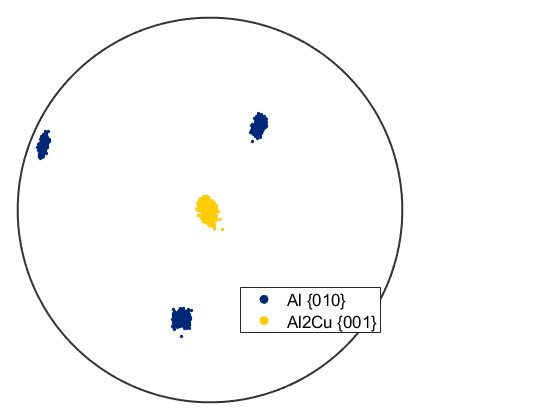

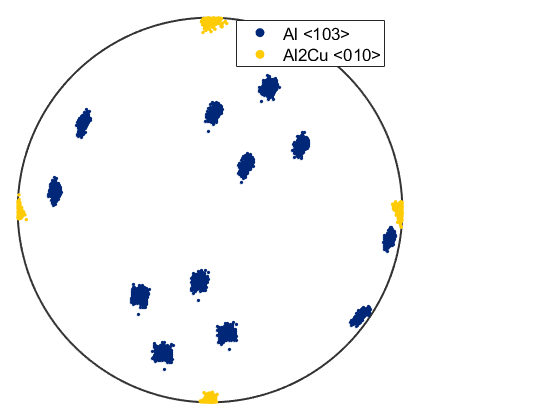

In [8]:
%Alpha 4 (001)_Al // (001)_Al2Cu and [130]_Al // [100]_Al2Cu
OR_label = 'alpha4';
Al_plane = [0 1 0];
Al2Cu_plane = [0 0 1];
Al_dir = [1 0 3];
Al2Cu_dir = [0 1 0];


disp([['Calculations for the OR ' OR_label ' defined as:'], newline, ...
    ['(' num2str(Al_plane) ')_Al || (' num2str(Al2Cu_plane) ')_Al2Cu'], newline,...
    ['[' num2str(Al_dir) ']_Al || [' num2str(Al2Cu_dir) ']_Al2Cu']]);
    
Al_plane_mtex = Miller(Al_plane(1),Al_plane(2),Al_plane(3),'hkl',Al_all_ori.CS, 'unique');
Al2Cu_plane_mtex = Miller(Al2Cu_plane(1),Al2Cu_plane(2),Al2Cu_plane(3),'hkl',Al2Cu_all_ori.CS, 'unique');
Al_dir_mtex = Miller(Al_dir(1),Al_dir(2),Al_dir(3),'uvw',Al_all_ori.CS, 'unique');
Al2Cu_dir_mtex =  Miller(Al2Cu_dir(1),Al2Cu_dir(2),Al2Cu_dir(3),'uvw',Al2Cu_all_ori.CS, 'unique');

%% Check OR values and output to command window
disp(' * Angle between plane and dir')
Al_plane_dir_angle = angle(Al_plane_mtex, Al_dir_mtex,'noSymmetry')./degree;
Al2Cu_plane_dir_angle = angle(Al2Cu_plane_mtex,Al2Cu_dir_mtex,'noSymmetry')./degree;
disp( [' * Angle between (' num2str(Al_plane) ')_Al and [' num2str(Al_dir) ']_Al :: ' num2str(Al_plane_dir_angle) ' deg.']);
disp( [' * Angle between (' num2str(Al2Cu_plane) ')_Al2Cu and [' num2str(Al2Cu_dir) ']_Al2Cu :: ' num2str(Al2Cu_plane_dir_angle) ' deg.']);


%% Align general PF to Al2Cu_001
Al_plane_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al_all_ori*symmetrise(Al_plane_mtex); 
Al2Cu_plane_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al2Cu_all_ori*symmetrise(Al2Cu_plane_mtex); 

Al_dir_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al_all_ori*symmetrise(Al_dir_mtex);
Al2Cu_dir_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al2Cu_all_ori*symmetrise(Al2Cu_dir_mtex); 

% format as string
Al_plane_legend_str = [num2str(abs(Al_plane(1))) num2str(abs(Al_plane(2))) num2str(abs(Al_plane(3)))];
Al2Cu_plane_legend_str = [num2str(abs(Al2Cu_plane(1))) num2str(abs(Al2Cu_plane(2))) num2str(abs(Al2Cu_plane(3)))];
Al_dir_legend_str = [num2str(abs(Al_dir(1))) num2str(abs(Al_dir(2))) num2str(abs(Al_dir(3)))];
Al2Cu_dir_legend_str = [num2str(abs(Al2Cu_dir(1))) num2str(abs(Al2Cu_dir(2))) num2str(abs(Al2Cu_dir(3)))];

% Show and save PF
figure,
% Al in Blue, [0 39 76]/255
plot(Al_plane_mtex_all_sym_ori,'DisplayName',...
    ['Al \{' Al_plane_legend_str '\}'],'antipodal', 'MarkerColor', [0 39 120]/255, 'MarkerSize',2)
hold on
% Al2Cu in yellow, [255 203 5]/255
plot(Al2Cu_plane_mtex_all_sym_ori,'DisplayName',...
    ['Al2Cu \{' Al2Cu_plane_legend_str '\}'],'antipodal', 'MarkerColor', [255 203 5]/255, 'MarkerSize',2)
hold off
legend('location','best')

figure,
plot(Al_dir_mtex_all_sym_ori,'DisplayName',...
    ['Al <' Al_dir_legend_str '>'],'antipodal','MarkerColor', [0 39 120]/255, 'MarkerSize',2)
hold on
plot(Al2Cu_dir_mtex_all_sym_ori,'DisplayName',...
    ['Al2Cu <' Al2Cu_dir_legend_str '>'],'antipodal','MarkerColor', [255 203 5]/255, 'MarkerSize',2)
hold off
legend('location','best')


Calculations for the OR OR1 defined as:
(2  2  1)_Al || (-1  1  0)_Al2Cu
[-1  0  2]_Al || [3  3  2]_Al2Cu
 * Angle between plane and dir
 * Angle between (2  2  1)_Al and [-1  0  2]_Al :: 90 deg.
 * Angle between (-1  1  0)_Al2Cu and [3  3  2]_Al2Cu :: 90 deg.



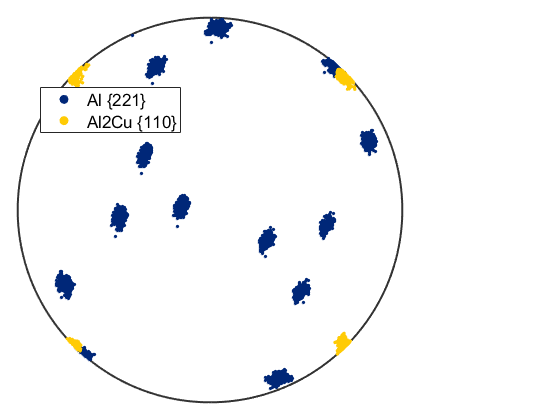

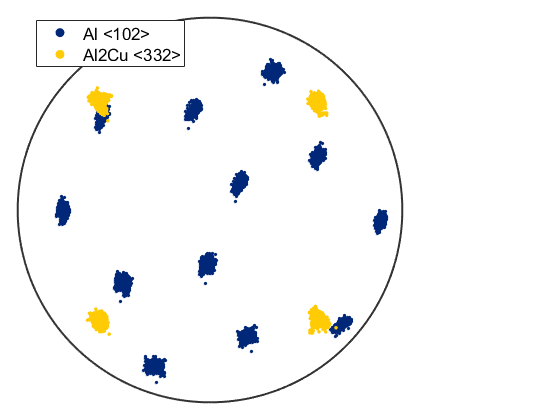

In [9]:
%% OR1
OR_label = 'OR1';
Al_plane = [2 2 1];
Al2Cu_plane = [-1 1 0];
Al_dir = [-1 0 2];
Al2Cu_dir = [3 3 2];


disp([['Calculations for the OR ' OR_label ' defined as:'], newline, ...
    ['(' num2str(Al_plane) ')_Al || (' num2str(Al2Cu_plane) ')_Al2Cu'], newline,...
    ['[' num2str(Al_dir) ']_Al || [' num2str(Al2Cu_dir) ']_Al2Cu']]);
    
Al_plane_mtex = Miller(Al_plane(1),Al_plane(2),Al_plane(3),'hkl',Al_all_ori.CS, 'unique');
Al2Cu_plane_mtex = Miller(Al2Cu_plane(1),Al2Cu_plane(2),Al2Cu_plane(3),'hkl',Al2Cu_all_ori.CS, 'unique');
Al_dir_mtex = Miller(Al_dir(1),Al_dir(2),Al_dir(3),'uvw',Al_all_ori.CS, 'unique');
Al2Cu_dir_mtex =  Miller(Al2Cu_dir(1),Al2Cu_dir(2),Al2Cu_dir(3),'uvw',Al2Cu_all_ori.CS, 'unique');

%% Check OR values and output to command window
disp(' * Angle between plane and dir')
Al_plane_dir_angle = angle(Al_plane_mtex, Al_dir_mtex,'noSymmetry')./degree;
Al2Cu_plane_dir_angle = angle(Al2Cu_plane_mtex,Al2Cu_dir_mtex,'noSymmetry')./degree;
disp( [' * Angle between (' num2str(Al_plane) ')_Al and [' num2str(Al_dir) ']_Al :: ' num2str(Al_plane_dir_angle) ' deg.']);
disp( [' * Angle between (' num2str(Al2Cu_plane) ')_Al2Cu and [' num2str(Al2Cu_dir) ']_Al2Cu :: ' num2str(Al2Cu_plane_dir_angle) ' deg.']);

%% Align general PF to Al2Cu_001
Al_plane_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al_all_ori*symmetrise(Al_plane_mtex); 
Al2Cu_plane_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al2Cu_all_ori*symmetrise(Al2Cu_plane_mtex); 

Al_dir_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al_all_ori*symmetrise(Al_dir_mtex);
Al2Cu_dir_mtex_all_sym_ori = inv(mean(Al2Cu_all_ori))*Al2Cu_all_ori*symmetrise(Al2Cu_dir_mtex); 

% format as string
Al_plane_legend_str = [num2str(abs(Al_plane(1))) num2str(abs(Al_plane(2))) num2str(abs(Al_plane(3)))];
Al2Cu_plane_legend_str = [num2str(abs(Al2Cu_plane(1))) num2str(abs(Al2Cu_plane(2))) num2str(abs(Al2Cu_plane(3)))];
Al_dir_legend_str = [num2str(abs(Al_dir(1))) num2str(abs(Al_dir(2))) num2str(abs(Al_dir(3)))];
Al2Cu_dir_legend_str = [num2str(abs(Al2Cu_dir(1))) num2str(abs(Al2Cu_dir(2))) num2str(abs(Al2Cu_dir(3)))];

% Show and save PF
figure,
% Al in Blue, [0 39 76]/255
plot(Al_plane_mtex_all_sym_ori,'DisplayName',...
    ['Al \{' Al_plane_legend_str '\}'],'antipodal', 'MarkerColor', [0 39 120]/255, 'MarkerSize',2)
hold on
% Al2Cu in yellow, [255 203 5]/255
plot(Al2Cu_plane_mtex_all_sym_ori,'DisplayName',...
    ['Al2Cu \{' Al2Cu_plane_legend_str '\}'],'antipodal', 'MarkerColor', [255 203 5]/255, 'MarkerSize',2)
hold off
legend('location','best')

figure,
plot(Al_dir_mtex_all_sym_ori,'DisplayName',...
    ['Al <' Al_dir_legend_str '>'],'antipodal','MarkerColor', [0 39 120]/255, 'MarkerSize',2)
hold on
plot(Al2Cu_dir_mtex_all_sym_ori,'DisplayName',...
    ['Al2Cu <' Al2Cu_dir_legend_str '>'],'antipodal','MarkerColor', [255 203 5]/255, 'MarkerSize',2)
hold off
legend('location','best')